

**Question 8.**  

Using the data from Question 5, write code the analyze the data and answer the following questions. 

Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations. 
2. Write code comments wherever required for code understanding. 

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all theseasons, like season 1 ratings, season 2, and so on. 
- Get all the episode names, whose average rating is more than 8 for every season.
- Get all the episode names that aired before May 2019.
- Get the episode name from each season with the highest and lowest rating.
- Get the summary for the most popular ( ratings ) episode in every season.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('shows_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'name', 'season', 'number', 'type',
       'airdate', 'airtime', 'runtime', 'Average Rating', 'summary',
       'Medium Image(url)', 'Original Image(url)'],
      dtype='object')

In [4]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace=True)

In [5]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,Average Rating,summary,Medium Image(url),Original Image(url)
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [6]:
df.shape

(36, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36 non-null     int64  
 1   url                  36 non-null     object 
 2   name                 36 non-null     object 
 3   season               36 non-null     int64  
 4   number               36 non-null     int64  
 5   type                 36 non-null     object 
 6   airdate              36 non-null     object 
 7   airtime              36 non-null     object 
 8   runtime              36 non-null     float64
 9   Average Rating       36 non-null     float64
 10  summary              36 non-null     object 
 11  Medium Image(url)    36 non-null     object 
 12  Original Image(url)  36 non-null     object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.8+ KB


In [8]:
df.describe()

,id,season,number,runtime,Average Rating
count,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,1.570518e+06,2.388889,5.055556,62.888889,7.872222
std,5.198296e+05,1.128280,2.714453,8.386308,0.373869
min,8.696710e+05,1.000000,1.000000,51.000000,7.100000
25%,9.430668e+05,1.000000,3.000000,60.000000,7.675000
50%,1.459790e+06,2.000000,5.000000,60.000000,7.800000
75%,1.807458e+06,3.000000,7.000000,60.000000,8.000000
max,2.326661e+06,4.000000,10.000000,90.000000,8.700000


In [9]:
df.isnull().sum()

id                     0
url                    0
name                   0
season                 0
number                 0
type                   0
airdate                0
airtime                0
runtime                0
Average Rating         0
summary                0
Medium Image(url)      0
Original Image(url)    0
dtype: int64

In [10]:
df['season'].value_counts()

1    10
2    10
3     8
4     8
Name: season, dtype: int64

In [11]:
df['number'].value_counts()

1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     2
10    2
Name: number, dtype: int64

In [12]:
df['Average Rating'].value_counts()

7.7    7
8.0    6
7.9    4
7.8    4
7.5    4
7.6    3
8.5    2
8.7    2
7.4    1
8.6    1
7.1    1
8.4    1
Name: Average Rating, dtype: int64

In [13]:
df['airdate'].value_counts()

2020-04-26    1
2018-05-27    1
2022-07-31    1
2022-08-14    1
2020-04-19    1
2020-05-03    1
2016-12-04    1
2022-08-07    1
2018-06-17    1
2018-04-22    1
2020-03-15    1
2018-05-20    1
2016-10-09    1
2016-11-13    1
2016-10-02    1
2018-05-06    1
2016-11-27    1
2022-07-10    1
2018-06-10    1
2020-04-05    1
2018-06-03    1
2018-04-29    1
2018-05-13    1
2022-07-03    1
2022-07-24    1
2016-10-23    1
2020-03-29    1
2020-04-12    1
2016-10-16    1
2022-06-26    1
2020-03-22    1
2022-07-17    1
2016-11-20    1
2018-06-24    1
2016-11-06    1
2016-10-30    1
Name: airdate, dtype: int64

In [14]:
# let us create a column for year : 


#df['Year'] = df['airdate'].apply(lambda x : x.split('-')[0])

df['airdate'] = pd.to_datetime(df['airdate'])

In [15]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,Average Rating,summary,Medium Image(url),Original Image(url)
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60.0,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60.0,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60.0,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [16]:
df1 = df.copy()

### - Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on. 

<AxesSubplot:xlabel='season'>

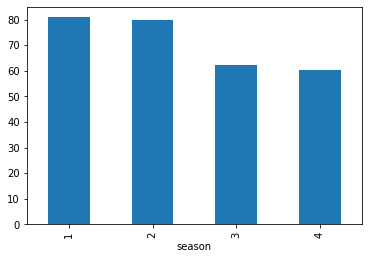

In [17]:
df1.groupby('season')['Average Rating'].sum().plot(kind = 'bar')

### - Get all the episode names, whose average rating is more than 8 for every season.

In [18]:
print(df1[df1['Average Rating'] > 8]['name'])

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object


### - Get all the episode names that aired before May 2019.

In [19]:
df1[df1['airdate'] < '2019-05-01']['name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

### - Get the episode name from each season with the highest and lowest rating.

In [20]:
df1.groupby('season')['Average Rating'].max()

season
1    8.7
2    8.7
3    8.0
4    7.8
Name: Average Rating, dtype: float64

In [21]:
df1.groupby('season')['Average Rating'].min()

season
1    7.6
2    7.6
3    7.5
4    7.1
Name: Average Rating, dtype: float64

In [22]:
df1[(df1['season'] == 1) & (df1['Average Rating'] == 8.7)]['name']

9    The Bicameral Mind
Name: name, dtype: object

In [23]:
df1[(df1['season'] == 1) & (df1['Average Rating'] == 7.6)]['name']

2    The Stray
Name: name, dtype: object

In [24]:
df1[(df1['season'] == 2) & (df1['Average Rating'] == 8.7)]['name']

17    Kiksuya
Name: name, dtype: object

In [25]:
df1[(df1['season'] == 2) & (df1['Average Rating'] == 7.6)]['name']

14    Akane No Mai
Name: name, dtype: object

In [26]:
df1[(df1['season'] == 3) & (df1['Average Rating'] == 8.0)]['name']

20            Parce Domine
23    The Mother of Exiles
Name: name, dtype: object

In [27]:
df1[(df1['season'] == 3) & (df1['Average Rating'] == 7.5)]['name']

25    Decoherence
26    Passed Pawn
Name: name, dtype: object

In [28]:
df1[(df1['season'] == 4) & (df1['Average Rating'] == 7.8)]['name']

32    Zhuangzi
Name: name, dtype: object

In [29]:
df1[(df1['season'] == 4) & (df1['Average Rating'] == 7.1)]['name']

28    The Auguries
Name: name, dtype: object

In [30]:
max_series = df1.groupby('season')['Average Rating'].max()

In [31]:
min_series = df1.groupby('season')['Average Rating'].min()

In [32]:
series_rating = df1.groupby('season')['Average Rating']

In [33]:
max_series[1]

8.7

In [34]:
slist = [df1[(df1['season'] == s) & (df1['Average Rating'] == r)]['name'].iloc(0) for s,r in zip(df1.groupby('season')['season'], max_series) ]

/home/chinmay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return op(a, b)
/home/chinmay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return op(a, b)
/home/chinmay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different

In [35]:
slist

### - Get the summary for the most popular ( ratings ) episode in every season.

In [36]:
# For most popular episodes rating will be high. 

In [37]:
df1[(df1['season'] == 1) & (df1['Average Rating'] == 8.7)]['summary']

9    Delores finds out the truth about William's fa...
Name: summary, dtype: object

In [38]:
df1['summary'][9]

"Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative."